In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import mason_functions as mf

In [2]:
def get_db_url(db_name):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

## For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

## Exercise 1
### A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
What is the probability that no cars drive up in the noon hour?

What is the probability that 3 or more cars come through the drive through?

How likely is it that the drive through gets at least 1 car?


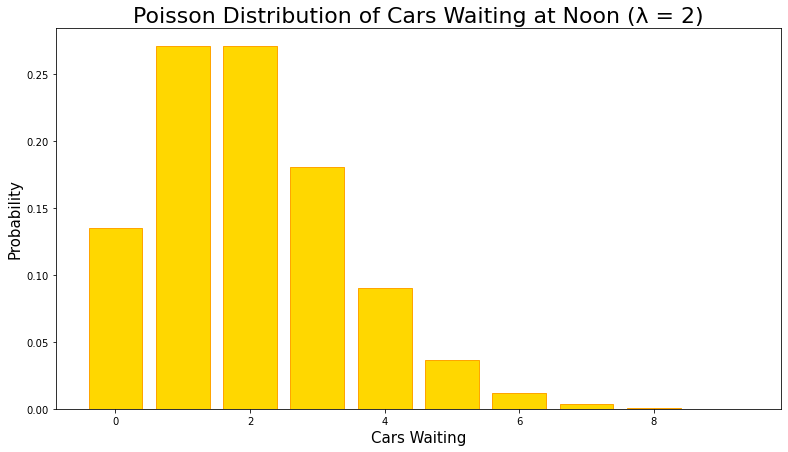

In [3]:
λ = 2
x = np.arange(0, 10)
y = stats.poisson(λ).pmf(x)
plt.figure(figsize = (13, 7))
plt.bar(x, y, color = 'gold', ec = 'orange')
plt.title('Poisson Distribution of Cars Waiting at Noon (λ = 2)', size = 22)
plt.xlabel('Cars Waiting', size = 15)
plt.ylabel('Probability', size = 15);

In [4]:
stats.poisson(λ).pmf(0)
#There is a 14% probability that no cars drive up in the noon hour

0.1353352832366127

In [5]:
stats.poisson(λ).sf(2)
#There is a 32% probability that 3 or more cars come through the drive through

0.32332358381693654

In [6]:
stats.poisson(λ).sf(0)
#There is an 86% probability that the drive through gets at least one car

0.8646647167633873

In [7]:
#alterntatively
1 - stats.poisson(λ).pmf(0)

0.8646647167633873

## Exercise 2
### Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
What grade point average is required to be in the top 5% of the graduating class?

What GPA constitutes the bottom 15% of the class?

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

If I have a GPA of 3.5, what percentile am I in?


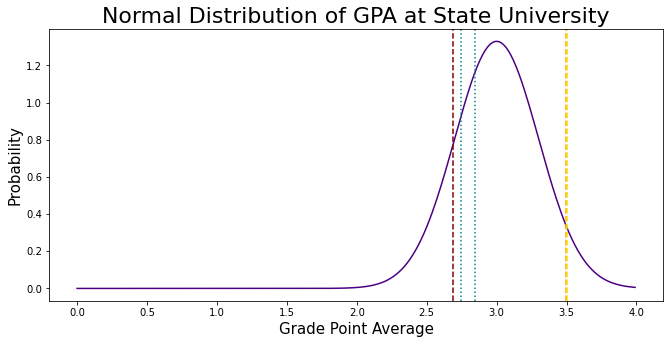

In [8]:
μ = 3
σ = .3
grades = stats.norm(μ, σ)
plt.figure(figsize = (11, 5))
plt.title('Normal Distribution of GPA at State University', size = 22)
plt.xlabel('Grade Point Average', size = 15)
plt.ylabel('Probability', size = 15)
x = np.arange(0, 4, .01)
y = stats.norm(μ, σ).pdf(x)
plt.plot(x, y, color = 'indigo')
plt.axvline(grades.isf(.05), color = 'orange', ls = '--')
plt.axvline(grades.ppf(.15), color = 'maroon', ls = '--')
plt.axvline(grades.ppf(.2), color = 'teal', ls = ':')
plt.axvline(grades.ppf(.3), color = 'teal', ls = ':')
plt.axvline((3.5), color = 'gold', ls = '--');

#### What grade point average is required to be in the top 5% of the graduating class?

In [9]:
grades.isf(.05)
#You need a GPA of 3.49 to be in the top 5% of the graduating class

3.4934560880854417

In [10]:
grades.ppf(.15)
#A GPA of 2.69 constitutes the bottom 15% of the class

2.689069983151863

In [11]:
grades.ppf(.3) #upper bound for range of third decile

2.842679846187588

In [12]:
grades.ppf(.2) #lower bound for range third decile

2.7475136299281258

In [13]:
grades.isf(.8) #alternate method for lower bound
#Yes, a student with a GPA of 2.8 would qualify for said scholarship

2.7475136299281258

In [14]:
#also
grades.ppf([.2, .3])
#the GPA range for the third decile from the bottom is 2.75 to 2.84

array([2.74751363, 2.84267985])

In [15]:
grades.cdf(3.5)
#With a GPA of 3.5, you are in the 96th percentile

0.9522096477271853

## Exercise 3
###  A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. 
How likely is it that this many people or more click through?

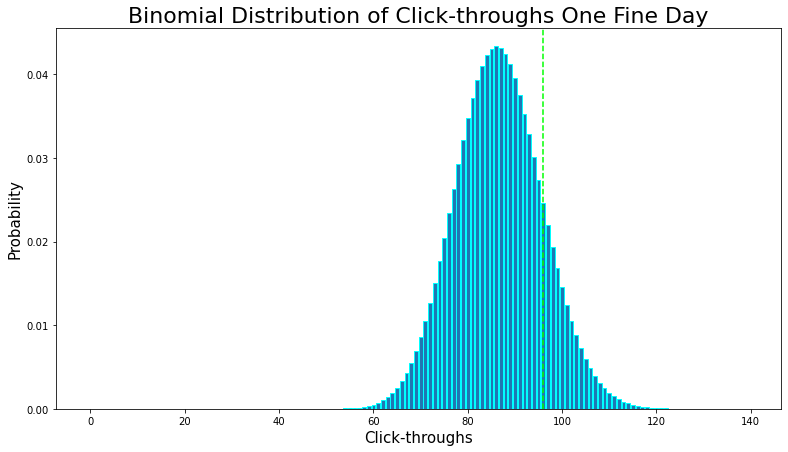

In [16]:
n_trials = 4326
p = .02
x = np.arange(0, 140)
y = stats.binom(n_trials, p).pmf(x)
plt.figure(figsize = (13, 7))
plt.bar(x, y, ec = 'cyan')
plt.title('Binomial Distribution of Click-throughs One Fine Day', size = 22)
plt.ylabel('Probability', size = 15)
plt.xlabel('Click-throughs', size = 15)
plt.axvline(x = 96, color = 'lime', ls = '--');

In [17]:
stats.binom(n_trials, p).sf(96)
#There is a 14% chance of getting 97 or more click-throughs

0.1397582363130086

## Exercise 4 
### You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
What is the probability that at least one of your first 60 answers is correct?


0.4528433576092388

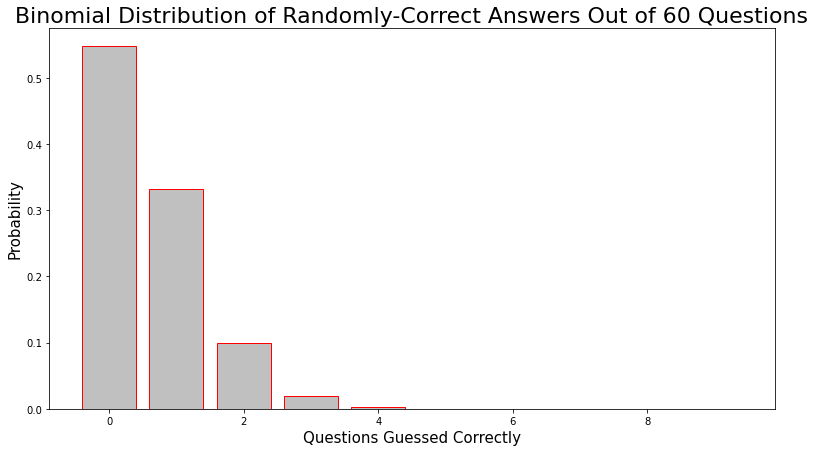

In [18]:
n_trials = 60
p = .01
plt.figure(figsize = (13, 7))
x = np.arange(0, 10, 1)
y = stats.binom(n_trials, p).pmf(x)
plt.bar(x, y, color = 'silver', ec = 'red')
plt.title('Binomial Distribution of Randomly-Correct Answers Out of 60 Questions', size = 22)
plt.xlabel('Questions Guessed Correctly', size = 15)
plt.ylabel('Probability', size = 15)

stats.binom(n_trials, p).sf(0)
#There is a 45% probability that you get at least one of your first 60 answers correct

## Exercise 5
### The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
How likely is it that the break area gets cleaned up each day? 

How likely is it that it goes two days without getting cleaned up? All week?



In [19]:
n_trials = round(3 * 22 * .9)
p = .03
stats.binom(n_trials, p).sf(0)
#There is an 83% chance that the breakroom will be cleaned up each day

0.8342199288437355

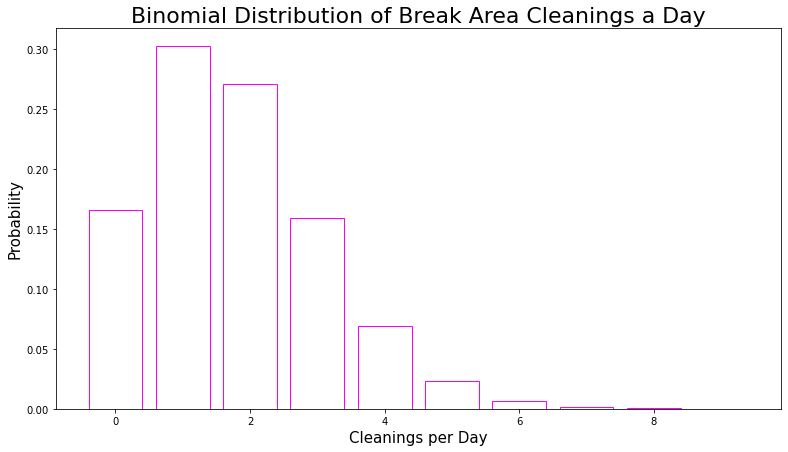

In [20]:
x = np.arange(0, 10)
y = stats.binom(n_trials, p).pmf(x)
plt.figure(figsize = (13, 7))
plt.bar(x, y, color = 'white', ec = 'magenta')
plt.title('Binomial Distribution of Break Area Cleanings a Day', size = 22)
plt.xlabel('Cleanings per Day', size = 15)
plt.ylabel('Probability', size = 15);

In [21]:
stats.binom(n_trials * 2, p).pmf(0)
#There is a 3% chance the break area will not be cleaned in 2 days

0.02748303199257622

In [22]:
stats.binom(n_trials * 5, p).pmf(0)
#There is a .01% chance the break area will not be cleaned in a week

0.00012521651388091353

## Exercise 6 
### You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
#### If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.



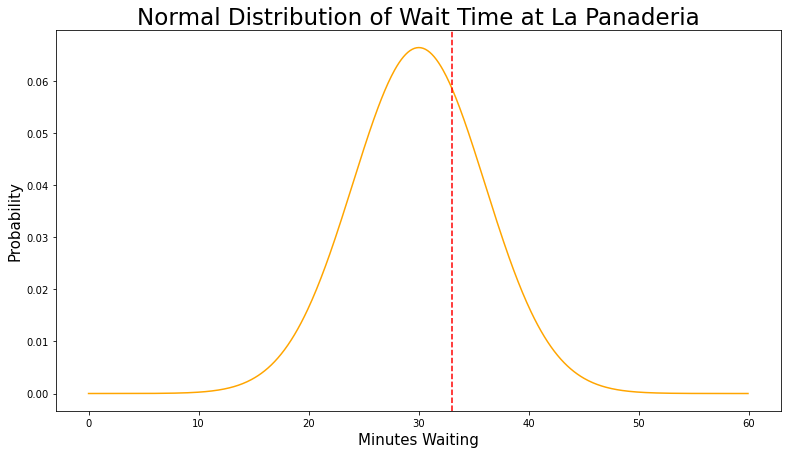

In [23]:
μ = 15 * 2 #minutes
σ = 3 * 2 #minutes
line = stats.norm(μ, σ)
plt.figure(figsize = (13, 7))
x = np.arange(0, 60, .1)
y = line.pdf(x)
plt.plot(x, y, color = 'orange')
plt.title('Normal Distribution of Wait Time at La Panaderia', size = 23)
plt.xlabel('Minutes Waiting', size = 15)
plt.ylabel('Probability', size = 15)
plt.axvline(x = 33, color = 'red', ls = '--');
#time left = 60 - 15 (at least 15 min left) - 2 (minutes to orer) - 10 (minutes to receive food) = max 33 minute wait time

In [24]:
line.cdf(33)
#There is a 69% probability that you will have at least 15 minutes to eat your food
#There is a 69% probability that you will have to wait 33 minutes or less

0.6914624612740131

## Exercise 7
### Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.
What percent of employees earn less than 60,000?

What percent of employees earn more than 95,000?

What percent of employees earn between 65,000 and 80,000?

What do the top 5% of employees make?

In [25]:
sql = """
SELECT *
FROM salaries
JOIN dept_emp USING(emp_no)
WHERE salaries.to_date > NOW() AND dept_emp.to_date > NOW()"""

url = get_db_url('employees')

employees = pd.read_sql(sql, url)
employees.head()

,emp_no,salary,from_date,to_date,dept_no,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01,d005,1986-06-26,9999-01-01
1,10002,72527,2001-08-02,9999-01-01,d007,1996-08-03,9999-01-01
2,10003,43311,2001-12-01,9999-01-01,d004,1995-12-03,9999-01-01
3,10004,74057,2001-11-27,9999-01-01,d004,1986-12-01,9999-01-01
4,10005,94692,2001-09-09,9999-01-01,d003,1989-09-12,9999-01-01


In [26]:
employees.info()
employees.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     240124 non-null  int64 
 1   salary     240124 non-null  int64 
 2   from_date  240124 non-null  object
 3   to_date    240124 non-null  object
 4   dept_no    240124 non-null  object
 5   from_date  240124 non-null  object
 6   to_date    240124 non-null  object
dtypes: int64(2), object(5)
memory usage: 12.8+ MB


,emp_no,salary
count,240124.000000,240124.000000
mean,253080.615365,72012.235857
std,161853.087323,17309.995380
min,10001.000000,38623.000000
25%,84878.750000,59048.750000
50%,249792.500000,69805.000000
75%,424895.250000,82546.000000
max,499999.000000,158220.000000


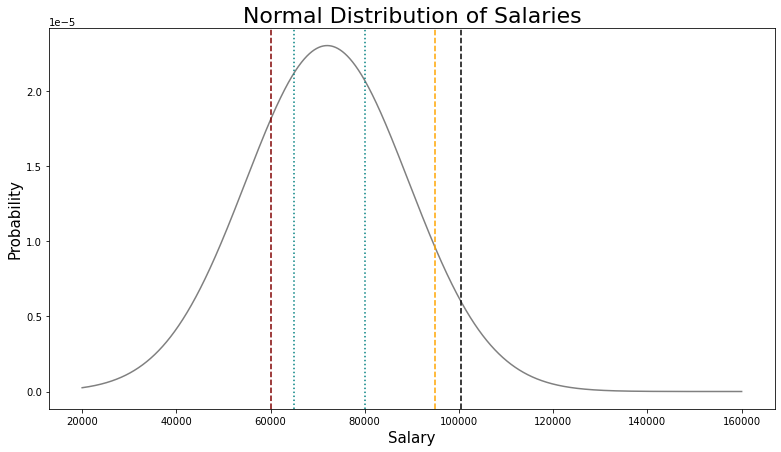

In [33]:
μ = employees.salary.mean()
σ = employees.salary.std()
current_salaries = stats.norm(μ, σ)
plt.figure(figsize = (13, 7))
x = np.arange(20_000, 160_000)
y = current_salaries.pdf(x)
plt.plot(x, y, color = 'gray')
plt.title('Normal Distribution of Salaries', size = 22)
plt.xlabel('Salary', size = 15)
plt.ylabel('Probability', size = 15)
plt.axvline(x = 59_999, color = 'maroon', ls = '--')
plt.axvline(x = 65_000, color = 'teal', ls = ':')
plt.axvline(x = 80_000, color = 'teal', ls = ':')
plt.axvline(x = 95_000, color = 'orange', ls = '--')
plt.axvline(x = current_salaries.isf(.05), color = 'black', ls = '--');

In [28]:
current_salaries.cdf(59_999.99)
#24% of employees earn less than $60,000

0.2438572436502896

In [29]:
current_salaries.sf(95_000)
#9% of employees earn more than $95,000

0.09208819199804053

In [30]:
np.diff(current_salaries.cdf([65_000, 80_000]))
#34% of employees earn between $65,000 and $80,000

array([0.33506057])

In [31]:
current_salaries.isf(.05)
#employee salaries in the top 5% make at least $104,000

100484.64454102777